In [ ]:
# displays output inline
%matplotlib inline

##Extrapolatory Data Analysis (EDA)

In [ ]:
#importing the required libraries
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
#Reading the data into the dataframe
df = pd.read_csv("HW1_house_price_regression.csv")

In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
#descriptive statistics
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
Bedroom        0.037719   -0.023438     0.263170  0.119690     0.101676   
Kitchen        0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [ ]:
# Checking for null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Data Cleaning 

In [ ]:
df["Alley"] = df['Alley'].fillna('No Alley Access')
df["BsmtQual"] = df['BsmtQual'].fillna('No Basement')
df["BsmtCond"] = df['BsmtCond'].fillna('No Basement')
df["BsmtExposure"] = df['BsmtExposure'].fillna('No Basement')
df["BsmtFinType1"] = df['BsmtFinType1'].fillna('No Basement')
df["BsmtFinType2"] = df['BsmtFinType2'].fillna('No Basement')
df["FireplaceQu"] = df['FireplaceQu'].fillna('No Fireplace')
df["GarageType"] = df['GarageType'].fillna('No Garage')
df["GarageFinish"] = df['GarageFinish'].fillna('No Garage')
df["GarageQual"] = df['GarageQual'].fillna('No Garage')
df["GarageCond"] = df['GarageCond'].fillna('No Garage')
df["PoolQC"] = df['PoolQC'].fillna('No Pool')
df["Fence"] = df['Fence'].fillna('No Fence')
df["MiscFeature"] = df['MiscFeature'].fillna('None')

#filling Nan with mean
df["LotFrontage"] = df['LotFrontage'].fillna(df["LotFrontage"].mean())

df["MasVnrArea"] = df['MasVnrArea'].fillna(df["MasVnrArea"].mean())
df["GarageYrBlt"] = df['GarageYrBlt'].fillna(df["YearBuilt"])
df["MasVnrType"] = df['MasVnrType'].fillna("None")
df["Electrical"] = df["Electrical"].fillna("SBrkr")
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
# Changing data types
df["MSSubClass"] = df["MSSubClass"].astype("object")
df["OverallQual"] = df["OverallQual"].astype("object")
df["OverallCond"] = df["OverallCond"].astype("object")
df["GarageYrBlt"] = df["GarageYrBlt"].astype("int64")
df["MoSold"] = df["MoSold"].astype("object")
df.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold            object
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
# Scaling the numerical data
scaler = MinMaxScaler()
df[["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","Bedroom","Kitchen","TotRmsAbvGrd","Fireplaces"]] = scaler.fit_transform(df[["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","Bedroom","Kitchen","TotRmsAbvGrd","Fireplaces"]])


## Visualization

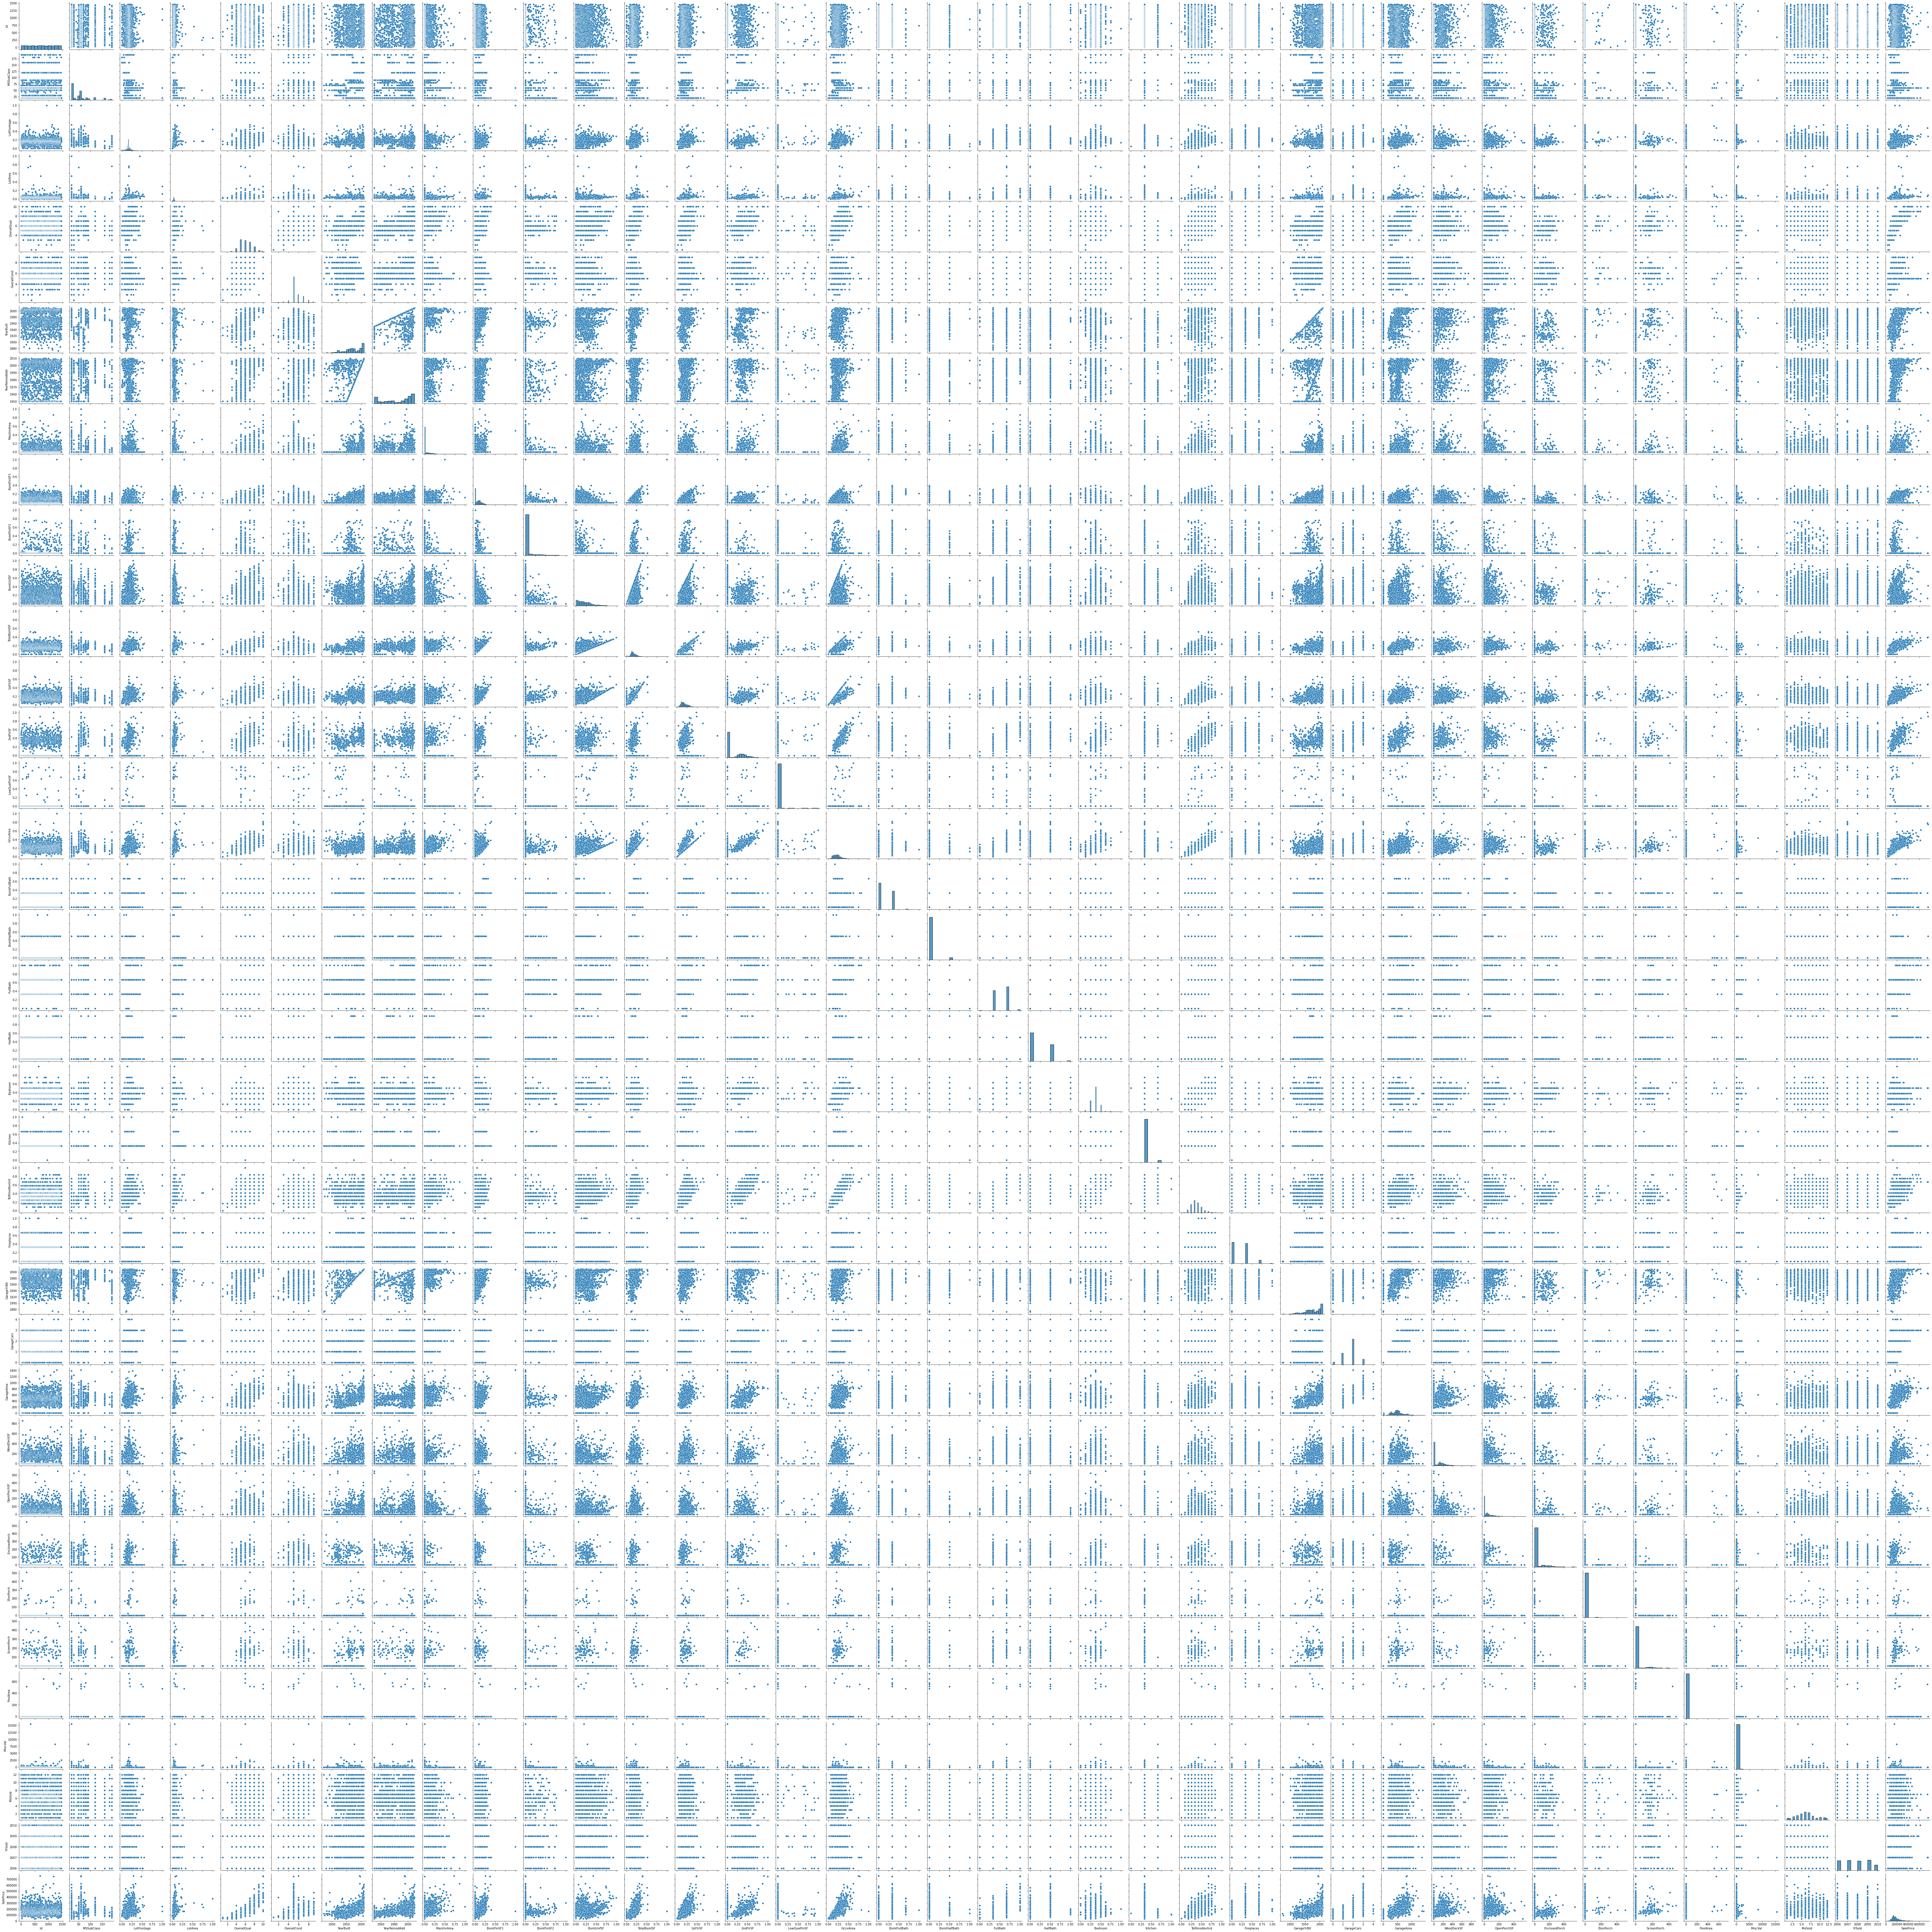

In [ ]:
sn.pairplot(df)

In [ ]:
# Transforming categorical data to dummies
df=pd.get_dummies(df)
df.head()

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1     0.150685  0.033420       2003          2003     0.12250    0.125089   
1   2     0.202055  0.038795       1976          1976     0.00000    0.173281   
2   3     0.160959  0.046507       2001          2002     0.10125    0.086109   
3   4     0.133562  0.038561       1915          1970     0.00000    0.038271   
4   5     0.215753  0.060576       2000          2000     0.21875    0.116052   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLw  SaleType_New  \
0         0.0   0.064212     0.140098  ...               0             0   
1         0.0   0.121575     0.206547  ...               0             0   
2         0.0   0.185788     0.150573  ...               0             0   
3         0.0   0.231164     0.123732  ...               0             0   
4         0.0   0.209760     0.187398  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0            1                      0                      0   
1             0            1                      0                      0   
2             0            1                      0                      0   
3             0            1                      1                      0   
4             0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 346 columns]

## Creating test and validation data

In [ ]:
train = df.drop(["Id","SalePrice"],axis=1)
test = df["SalePrice"]


In [ ]:
from sklearn.model_selection import train_test_split
# split the data and target into training and validation sets
data_train, data_valid, target_train, target_valid = train_test_split(train, test, test_size=0.3, random_state=0)
# verify sizes
print("After:\nTraining Data = %s\nValidation Data = %s" % (data_train.shape, data_valid.shape))
print("Training Target = %s\nValidation Target = %s" % (target_train.shape, target_valid.shape))

After:
Training Data = (1022, 344)
Validation Data = (438, 344)
Training Target = (1022,)
Validation Target = (438,)


## ML Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
# create mlr model
mlr = LinearRegression()
# fit the training data
mlr.fit(data_train, target_train)

LinearRegression()

In [ ]:
#Printing the regression metrics
print("Variables = %s" % data_train.columns.tolist())
print("Coefficients = %s" % mlr.coef_)
print("Intercept = %f" % mlr.intercept_)
print("R2 for training = %.5f" % mlr.score(data_train, target_train))
print("R2 for validation = %.5f" % mlr.score(data_valid, target_valid))

Variables = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_No Alley Access', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandCon

In [ ]:
y_predicted_train = mlr.predict(data_train)
y_predicted_test = mlr.predict(data_valid)
rmse_train = mean_squared_error(target_train, y_predicted_train, squared=False)
rmse_test = mean_squared_error(target_valid,y_predicted_test,squared=False)
mae_train = mean_absolute_error(target_train, y_predicted_train)
mae_test = mean_absolute_error(target_valid,y_predicted_test)
print("RMSE for training = %.5f" % rmse_train)
print("RMSE for validation = %.5f" % rmse_test)
print("MAE for training = %.5f"%mae_train)
print("MAE for validation = %.5f"%mae_test)

RMSE for training = 16759.62454
RMSE for validation = 51705.79545
MAE for training = 11226.96187
MAE for validation = 21354.38097
